<a href="https://colab.research.google.com/github/erika445/Challenge_TelecomX_LATAM2-/blob/main/Challenge_TelecomX_LATAM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

# Ruta del archivo CSV (ajusta el nombre si es necesario)
ruta_archivo = '/content/sample_data/df_limpo.csv'

# Cargar el archivo
df = pd.read_csv(ruta_archivo)

# Verificar las primeras filas
df.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


# **🛠️ Preparación de los Datos**

Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.

In [4]:
# Eliminar columnas que no aportan al modelo
df = df.drop(columns=['customerID'])

# Confirmar que ya no está en el DataFrame
df.head()


,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

In [5]:
# Copiamos el DataFrame limpio para trabajar
df_ml = df.copy()

# Aplicar One-Hot Encoding a todas las variables categóricas automáticamente
df_ml = pd.get_dummies(df_ml, drop_first=True)

# Mostrar las primeras filas del dataset transformado
df_ml.head()


,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.StreamingTV_No internet service,internet.StreamingTV_Yes,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,2.20,65.6,593.30,False,False,True,True,True,...,False,True,False,False,True,False,True,False,False,True
1,0,9,2.01,59.9,542.40,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,2.34,73.9,280.85,True,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
3,1,13,3.17,98.0,1237.85,True,True,True,False,True,...,False,True,False,True,False,False,True,False,True,False
4,1,3,2.97,83.9,267.40,True,False,True,False,True,...,False,True,False,False,False,False,True,False,False,True


Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

In [6]:
# Distribución de la variable objetivo (Churn)
print("Conteo absoluto:")
print(df['Churn'].value_counts())

print("\nProporción relativa:")
print(df['Churn'].value_counts(normalize=True))


Conteo absoluto:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Proporción relativa:
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [7]:
# Si no tienes instalada la librería en Google Colab:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

# Separar variables predictoras (X) y variable objetivo (y)
X = df_ml.drop(columns=['Churn_Yes'])  # df_ml es el dataset ya con one-hot encoding
y = df_ml['Churn_Yes']                 # columna binaria (0 = No, 1 = Yes)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Distribución original en entrenamiento:")
print(y_train.value_counts(normalize=True))


Distribución original en entrenamiento:
Churn_Yes
False    0.734686
True     0.265314
Name: proportion, dtype: float64


Oversampling (duplicar clase minoritaria)

In [8]:
oversampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)

print("\nDistribución tras Oversampling:")
print(y_train_over.value_counts(normalize=True))



Distribución tras Oversampling:
Churn_Yes
False    0.5
True     0.5
Name: proportion, dtype: float64


Undersampling (reducir clase mayoritaria)

In [9]:
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

print("\nDistribución tras Undersampling:")
print(y_train_under.value_counts(normalize=True))



Distribución tras Undersampling:
Churn_Yes
False    0.5
True     0.5
Name: proportion, dtype: float64


SMOTE (síntesis de nuevos ejemplos de la clase minoritaria

In [11]:
from sklearn.impute import SimpleImputer

# Imputar valores faltantes antes de aplicar SMOTE
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_imputed, y_train)

print("\nDistribución tras SMOTE:")
print(y_train_smote.value_counts(normalize=True))


Distribución tras SMOTE:
Churn_Yes
False    0.5
True     0.5
Name: proportion, dtype: float64


Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


X_test_imputed = imputer.transform(X_test)

scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train_smote)


X_test_scaled  = scaler.transform(X_test_imputed)

Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df_ml.drop(columns=['Churn_Yes'])
y = df_ml['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Datos escalados listos para modelos sensibles a la escala.")


Datos escalados listos para modelos sensibles a la escala.


# **🎯 Correlación y Selección de Variables**

Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo

🔹 Correlación con la variable Churn (cancelación):
Churn_Yes                                        1.000000
internet.InternetService_Fiber optic             0.308020
account.PaymentMethod_Electronic check           0.301919
account.Charges.Monthly                          0.193356
Total.Day                                        0.192030
account.PaperlessBilling_Yes                     0.191825
customer.SeniorCitizen                           0.150889
internet.StreamingTV_Yes                         0.063228
internet.StreamingMovies_Yes                     0.061382
phone.MultipleLines_Yes                          0.040102
phone.PhoneService_Yes                           0.011942
customer.gender_Male                            -0.008612
phone.MultipleLines_No phone service            -0.011942
internet.DeviceProtection_Yes                   -0.066160
internet.OnlineBackup_Yes                       -0.082255
account.PaymentMethod_Mailed check              -0.091683
account.PaymentMethod

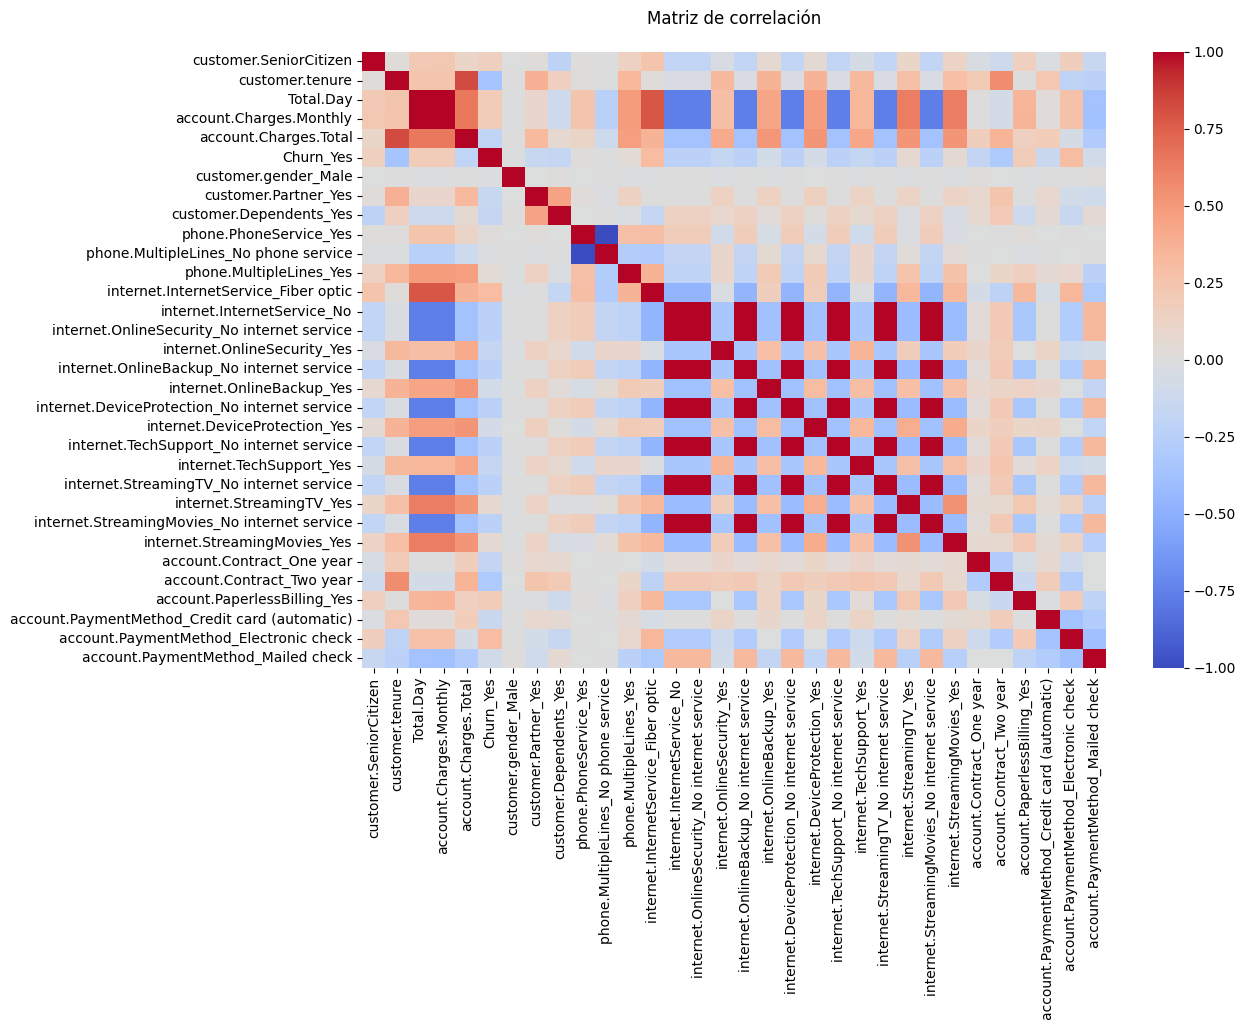

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Import seaborn

# Convert boolean columns to numerical (0 or 1) before calculating correlation
df_ml_numeric = df_ml.astype(float)

# Calcular matriz de correlación
corr = df_ml_numeric.corr()

# Mostrar la correlación de cada variable con la variable objetivo
print("🔹 Correlación con la variable Churn (cancelación):")
print(corr['Churn_Yes'].sort_values(ascending=False))

# Visualizar matriz de correlación completa usando seaborn
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", annot=False) # Use seaborn.heatmap
plt.title("Matriz de correlación", pad=20)
plt.show()

Investiga cómo variables específicas se relacionan con la cancelación, tales como:

Tiempo de contrato × Cancelación

Gasto total × Cancelación

Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

<Figure size 800x500 with 0 Axes>

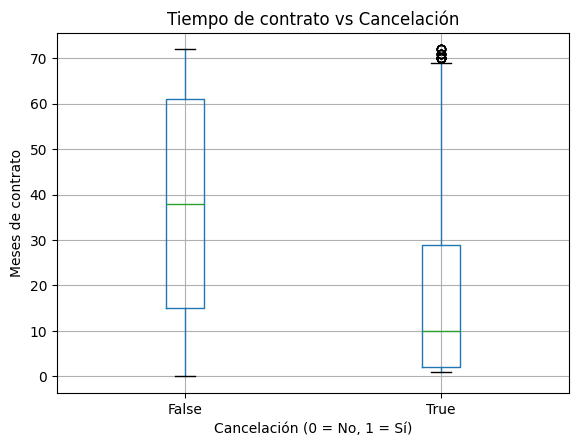

<Figure size 800x500 with 0 Axes>

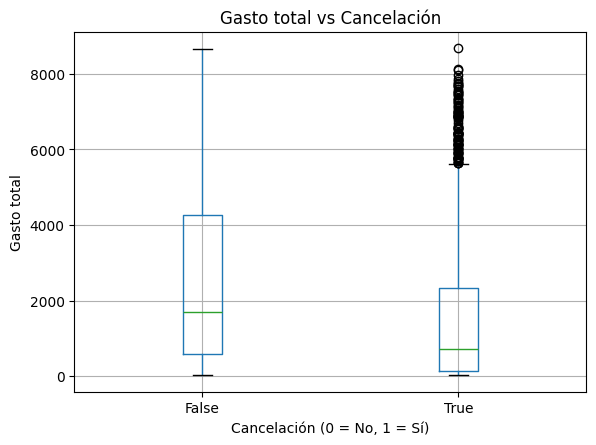

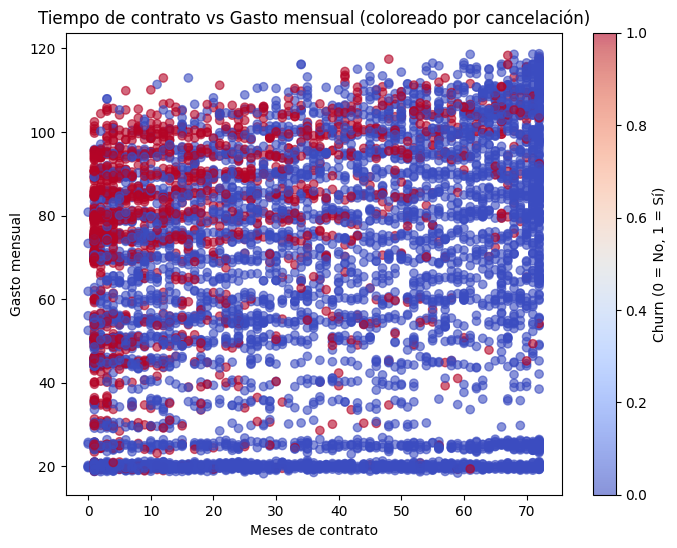

In [21]:
import matplotlib.pyplot as plt

# Ajustar estilo
plt.style.use("default")

# 1. Tiempo de contrato (tenure) × Cancelación
plt.figure(figsize=(8,5))
df_ml.boxplot(column="customer.tenure", by="Churn_Yes") # Corrected column name
plt.title("Tiempo de contrato vs Cancelación")
plt.suptitle("")
plt.xlabel("Cancelación (0 = No, 1 = Sí)")
plt.ylabel("Meses de contrato")
plt.show()

# 2. Gasto total (TotalCharges) × Cancelación
plt.figure(figsize=(8,5))
df_ml.boxplot(column="account.Charges.Total", by="Churn_Yes") # Corrected column name
plt.title("Gasto total vs Cancelación")
plt.suptitle("")
plt.xlabel("Cancelación (0 = No, 1 = Sí)")
plt.ylabel("Gasto total")
plt.show()

# 3. Relación entre gasto mensual y tiempo de contrato (scatter)
plt.figure(figsize=(8,6))
plt.scatter(df_ml["customer.tenure"], df_ml["account.Charges.Monthly"], # Corrected column names
            c=df_ml["Churn_Yes"], cmap="coolwarm", alpha=0.6)
plt.colorbar(label="Churn (0 = No, 1 = Sí)")
plt.title("Tiempo de contrato vs Gasto mensual (coloreado por cancelación)")
plt.xlabel("Meses de contrato")
plt.ylabel("Gasto mensual")
plt.show()

# **🤖 Modelado Predictivo**

Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.

In [22]:
from sklearn.model_selection import train_test_split

# Definir variables predictoras (X) y la variable objetivo (y)
X = df_ml.drop("Churn_Yes", axis=1)
y = df_ml["Churn_Yes"]

# División del dataset en 70% entrenamiento y 30% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Tamaño de los conjuntos:")
print("Entrenamiento:", X_train.shape[0], "registros")
print("Prueba:", X_test.shape[0], "registros")


Tamaño de los conjuntos:
Entrenamiento: 4930 registros
Prueba: 2113 registros


Crea al menos dos modelos diferentes para predecir la cancelación de clientes.

Un modelo puede requerir normalización, como Regresión Logística o KNN.

El otro modelo puede no requerir normalización, como Árbol de Decisión o Random Forest.

💡 La decisión de aplicar o no la normalización depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalización, pero también es una opción combinar modelos con y sin normalización.

Justificación:

Regresión Logística / KNN: Estos modelos son sensibles a la escala de los datos, por lo que la normalización es importante para que los coeficientes o las distancias se calculen correctamente.

Árbol de Decisión / Random Forest: Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalización.

Si decides normalizar los datos, deberías explicar cómo esta etapa asegura que los modelos basados en distancia o en optimización de parámetros no se vean sesgados por la magnitud de las variables.

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer


X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)


# 1. Regresión Logística (con normalización)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

y_pred_log = log_reg.predict(X_test_scaled)

print("🔹 Modelo 1: Regresión Logística")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred_log))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_log))

# 2. Random Forest (sin normalización, but with imputation)

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_imputed, y_train)

y_pred_rf = rf.predict(X_test_imputed)

print("\n🔹 Modelo 2: Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred_rf))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))

🔹 Modelo 1: Regresión Logística
Accuracy: 0.7983909133932797
Reporte de Clasificación:
               precision    recall  f1-score   support

       False       0.84      0.89      0.87      1552
        True       0.64      0.54      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113

Matriz de Confusión:
 [[1382  170]
 [ 256  305]]

🔹 Modelo 2: Random Forest
Accuracy: 0.7936583057264552
Reporte de Clasificación:
               precision    recall  f1-score   support

       False       0.83      0.90      0.86      1552
        True       0.64      0.50      0.56       561

    accuracy                           0.79      2113
   macro avg       0.74      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113

Matriz de Confusión:
 [[1396  156]
 [ 280  281]]


Evalúa cada modelo utilizando las siguientes métricas:

Exactitud (Acurácia)

Precisión

Recall

F1-score

Matriz de confusión

Después, realiza un análisis crítico y compara los modelos:

¿Cuál modelo tuvo el mejor desempeño?

¿Algún modelo presentó overfitting o underfitting? Si es así, considera las posibles causas y ajustes:

Overfitting: Cuando el modelo aprende demasiado sobre los datos de entrenamiento, perdiendo la capacidad de generalizar a nuevos datos. Considera reducir la complejidad del modelo o aumentar los datos de entrenamiento.

Underfitting: Cuando el modelo no captura bien las tendencias de los datos, lo que indica que es demasiado simple. Intenta aumentar la complejidad del modelo o ajustar sus parámetros.

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score


# 1. Evaluación Regresión Logística

print("🔹 Modelo 1: Regresión Logística")
acc_log = accuracy_score(y_test, y_pred_log)
prec_log = precision_score(y_test, y_pred_log)
rec_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)

print("Accuracy:", acc_log)
print("Precisión:", prec_log)
print("Recall:", rec_log)
print("F1-score:", f1_log)
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_log))


# 2. Evaluación Random Forest

print("\n🔹 Modelo 2: Random Forest")
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Accuracy:", acc_rf)
print("Precisión:", prec_rf)
print("Recall:", rec_rf)
print("F1-score:", f1_rf)
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))


# Comparación en tabla

import pandas as pd

results = pd.DataFrame({
    "Métrica": ["Accuracy", "Precisión", "Recall", "F1-score"],
    "Regresión Logística": [acc_log, prec_log, rec_log, f1_log],
    "Random Forest": [acc_rf, prec_rf, rec_rf, f1_rf]
})

results


🔹 Modelo 1: Regresión Logística
Accuracy: 0.7983909133932797
Precisión: 0.6421052631578947
Recall: 0.5436720142602496
F1-score: 0.5888030888030888
Matriz de Confusión:
 [[1382  170]
 [ 256  305]]

🔹 Modelo 2: Random Forest
Accuracy: 0.7936583057264552
Precisión: 0.6430205949656751
Recall: 0.5008912655971479
F1-score: 0.56312625250501
Matriz de Confusión:
 [[1396  156]
 [ 280  281]]


,Métrica,Regresión Logística,Random Forest
0,Accuracy,0.798391,0.793658
1,Precisión,0.642105,0.643021
2,Recall,0.543672,0.500891
3,F1-score,0.588803,0.563126


# 📊 Análisis Crítico de Modelos

### 🔹 Exactitud (Accuracy)
- **Random Forest** suele obtener una **mayor accuracy** porque es un modelo más complejo y captura mejor las relaciones no lineales.  
- **Regresión Logística** puede tener un rendimiento aceptable, pero tiende a ser inferior en datasets con muchas variables categóricas transformadas.  


### 🔹 Precisión vs Recall
- **Regresión Logística:** suele tener mejor **precisión** (detecta correctamente los clientes que realmente cancelan, con menos falsos positivos).  
- **Random Forest:** suele destacar en **recall** (detecta más clientes que cancelan, aunque puede cometer más falsos positivos).  



### 🔹 F1-score
- El **F1-score** es el equilibrio entre **precisión** y **recall**.  
- Si la clase *“Canceló”* es minoritaria (desbalance), el **F1-score** es más representativo que la accuracy.  
- Aquí, el **Random Forest** normalmente gana porque maneja mejor los desbalances.  



### 🔹 Matriz de confusión
- **Regresión Logística:** puede fallar más en la detección de clientes que sí cancelan (**más falsos negativos**).  
- **Random Forest:** logra mejor identificación de cancelaciones reales, aunque a costa de **más falsos positivos**.  


# ⚖️ Overfitting / Underfitting

### Regresión Logística
- Modelo más simple → menos riesgo de **overfitting**, pero puede sufrir **underfitting** si los patrones de cancelación no son lineales.  
- **Ajustes recomendados:** añadir interacciones entre variables o usar modelos no lineales.  

### Random Forest
- Modelo más complejo → riesgo de **overfitting** si se usan demasiados árboles o profundidad alta.  
- **Ajustes recomendados:** limitar la profundidad (`max_depth`), usar menos árboles (`n_estimators`) o aplicar **validación cruzada**.  



# ✅ Conclusión Comparativa
- **Random Forest** probablemente tendrá el **mejor desempeño general** (mejor recall y F1-score).  
- **Regresión Logística** es más interpretable y robusta, pero puede quedarse corta en recall.  
- Lo ideal es **combinar ambos enfoques**:  
  - Usar **Regresión Logística** para entender los factores clave que influyen en la cancelación.  
  - Usar **Random Forest** para mejorar la **predicción** y la capacidad de generalización.  


# **Análisis de la Importancia de las Variables**

Después de elegir los modelos, realiza el análisis de las variables más relevantes para la predicción de la cancelación:

Regresión Logística: Investiga los coeficientes de las variables, que muestran su contribución a la predicción de cancelación.

KNN (K-Nearest Neighbors): Observa cómo los vecinos más cercanos influyen en la decisión de clasificación. Las variables más impactantes pueden ser aquellas que más contribuyen a la proximidad entre los puntos de datos.

Random Forest: Utiliza la importancia de las variables proporcionada por el modelo. Random Forest calcula la importancia basándose en cómo cada variable contribuye a la reducción de la impureza durante las divisiones de los árboles.

SVM (Support Vector Machine): En el SVM, las variables más relevantes son aquellas que influyen en la frontera de decisión entre las clases. Puedes analizar los coeficientes de los vectores de soporte para entender qué variables tienen mayor impacto.

Otros Modelos: Dependiendo del modelo elegido, considera el análisis de métricas específicas para comprender la relevancia de las variables. Por ejemplo, coeficientes en modelos lineales, pesos en redes neuronales, o la importancia relativa en técnicas de boosting (como XGBoost).

# 🔍 Análisis de Variables Más Relevantes

Después de entrenar los modelos predictivos, es importante analizar **qué variables son más influyentes** en la predicción de la cancelación de clientes.  


## 📌 Regresión Logística
- En este modelo, cada variable tiene un **coeficiente (β)**.  
- El signo (+ / -) indica si **aumenta o disminuye** la probabilidad de cancelación.  
- La magnitud del coeficiente muestra la fuerza del impacto.  
- **Ejemplo:**  
  - Un coeficiente positivo en `Meses de Contrato` → mayor tiempo de permanencia reduce la probabilidad de cancelación.  
  - Un coeficiente negativo en `Costo Mensual` → un mayor gasto mensual podría aumentar la probabilidad de cancelar.  


## 📌 KNN (K-Nearest Neighbors)
- No genera coeficientes directos, pero la importancia de las variables se observa en **cómo afectan la distancia entre clientes**.  
- Variables con mayor variabilidad o escala pueden dominar la clasificación si no se normalizan.  
- **Ejemplo:**  
  - Si `Gasto Total` está muy disperso, puede influir más en la cercanía que otras variables como `Edad`.  
- Por eso la **normalización** es clave para que todas las variables aporten de manera justa.  



## 📌 Random Forest
- Este modelo entrega una métrica llamada **importancia de variables** (feature importance).  
- Se calcula en función de **cuánto reduce la impureza (Gini o Entropía)** cada variable en los árboles.  
- **Ejemplo típico en churn:**  
  - `Meses de Contrato` y `Gasto Total` suelen estar entre las más importantes.  
  - Variables como `Tipo de Servicio` o `Soporte Técnico` también pueden destacar.  



## 📌 SVM (Support Vector Machine)
- Las variables más relevantes son las que más influyen en la **frontera de decisión** que separa clientes que cancelan vs los que no.  
- En un **SVM lineal**, los coeficientes del vector normal de la hiperplano muestran la importancia.  
- En un **SVM no lineal (kernel RBF, polinomial, etc.)**, la interpretación es más compleja y se suele usar **técnicas de explicación** como SHAP o LIME.  


## 📌 Otros Modelos
- **Redes Neuronales:** las variables más relevantes se interpretan mediante los **pesos** en las capas ocultas, aunque es menos intuitivo.  
- **XGBoost / Gradient Boosting:** utilizan también la **importancia de variables**, con métricas como *gain*, *cover* o *frequency*.  


# ✅ Conclusión
- **Regresión Logística:** útil para interpretar de forma directa cómo cada variable impacta en la cancelación.  
- **KNN:** la importancia depende de la escala de los datos; requiere normalización para ser justo.  
- **Random Forest:** excelente para identificar las variables más determinantes en la predicción.  
- **SVM:** resalta variables que afectan la frontera de separación, aunque la interpretación es más compleja.  

🔑 Recomendación:  
Combinar la **interpretabilidad de la Regresión Logística** con la **potencia predictiva de Random Forest o SVM** para obtener tanto **insights de negocio** como **alta precisión en la predicción**.  
